In [1]:
import pandas as pd
import copy
from sklearn.preprocessing import LabelEncoder
from scipy import sparse
import scipy
import numpy as np
import anndata
import matplotlib.pyplot as plt

import bokeh.plotting
import bokeh.io
bokeh.io.output_notebook()

import scanpy as sc
import seaborn as sns
from collections import OrderedDict
from Bio import SeqIO
import os
import glob

from scipy import io
import time
from scipy import stats

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
sns.set()

Loading BokehJS ...

In [2]:
MOpadata = sc.read('/Users/nadia/git/isoformDE/data/MOpdata.h5ad',sep=',')


AttributeError: module 'scanpy' has no attribute 'read'

In [3]:
work_folder = '/home/nadia/isoformDE/data/outputs/'


In [142]:
matrix_onecell = pd.read_csv(work_folder+'MOp/'+'SM-D9D8P_S52_E1-50/'+'abundance.tsv',sep='\t')


In [143]:
matrix_onecell.tail(10)

target_id  length  eff_length  est_counts  tpm
116057  ENSMUST00000181878.2    1524    1336.610         0.0  0.0
116058  ENSMUST00000201504.1     545     360.765         0.0  0.0
116059  ENSMUST00000181583.4     387     212.100         0.0  0.0
116060  ENSMUST00000181459.3     451     270.942         0.0  0.0
116061  ENSMUST00000200975.1     549     364.674         0.0  0.0
116062  ENSMUST00000202689.1     545     360.765         0.0  0.0
116063  ENSMUST00000230354.1     375     201.406         0.0  0.0
116064  ENSMUST00000202219.1     639     452.944         0.0  0.0
116065  ENSMUST00000202716.1     795     607.887         0.0  0.0
116066  ENSMUST00000200997.1     835     647.762         0.0  0.0

In [6]:
df = pd.DataFrame(index = matrix_onecell.target_id)

In [144]:
# Glob string for images
cells_glob = os.path.join(work_folder,'MOp/*/abundance.tsv')

# Get list of files in directory
cells_list = sorted(glob.glob(cells_glob))

# Let's look at the list
cells_list
cell_names = []
for i in cells_list:
    cell_names.append(i[40:59])
#cell_names

In [140]:
cells_list[:3]

['/home/nadia/isoformDE/data/outputs/HYa1/SM-GE8WS_S025_E1-50_kallisto/abundance.tsv',
 '/home/nadia/isoformDE/data/outputs/HYa1/SM-GE8WS_S026_E1-50_kallisto/abundance.tsv',
 '/home/nadia/isoformDE/data/outputs/HYa1/SM-GE8WS_S027_E1-50_kallisto/abundance.tsv']

In [148]:
matrix_onecell.est_counts.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: est_counts, dtype: float64

In [154]:
cells_list[20:34]


['/home/nadia/isoformDE/data/outputs/MOp/LS-15396_S45_E1-50/abundance.tsv',
 '/home/nadia/isoformDE/data/outputs/MOp/LS-15396_S46_E1-50/abundance.tsv',
 '/home/nadia/isoformDE/data/outputs/MOp/LS-15396_S47_E1-50/abundance.tsv',
 '/home/nadia/isoformDE/data/outputs/MOp/LS-15396_S48_E1-50/abundance.tsv',
 '/home/nadia/isoformDE/data/outputs/MOp/LS-15396_S49_E1-50/abundance.tsv',
 '/home/nadia/isoformDE/data/outputs/MOp/LS-15396_S50_E1-50/abundance.tsv',
 '/home/nadia/isoformDE/data/outputs/MOp/LS-15396_S51_E1-50/abundance.tsv',
 '/home/nadia/isoformDE/data/outputs/MOp/LS-15396_S52_E1-50/abundance.tsv',
 '/home/nadia/isoformDE/data/outputs/MOp/LS-15396_S53_E1-50/abundance.tsv',
 '/home/nadia/isoformDE/data/outputs/MOp/LS-15396_S54_E1-50/abundance.tsv',
 '/home/nadia/isoformDE/data/outputs/MOp/LS-15396_S55_E1-50/abundance.tsv',
 '/home/nadia/isoformDE/data/outputs/MOp/LS-15396_S56_E1-50/abundance.tsv',
 '/home/nadia/isoformDE/data/outputs/MOp/LS-15396_S57_E1-50/abundance.tsv',
 '/home/nadi

In [165]:
cell_name = cells_list[0][39:]
cell_name = cell_name[:-14]
cell_name

'LS-15395_S41_E1-50'

In [163]:
cells_list[0][:-14]

'/home/nadia/isoformDE/data/outputs/MOp/LS-15395_S41_E1-50'

In [172]:
#%%time

df = pd.DataFrame(index = matrix_onecell.target_id)
number = 0
for cell in cells_list[:10]:
    matrix_onecell = pd.read_csv(cell,sep='\t')
    cell_name = cell[39:]
    cell_name = cell_name[:-14]
    df[cell_name]=list(matrix_onecell.est_counts)
#    print(df.head(1))
    
#otherDF = df
    

In [173]:
df.shape

(116067, 10)

In [175]:
df.head()

LS-15395_S41_E1-50  LS-15395_S42_E1-50  \
target_id                                                      
ENSMUST00000196221.1                 0.0                 0.0   
ENSMUST00000179664.1                 0.0                 0.0   
ENSMUST00000177564.1                 0.0                 0.0   
ENSMUST00000178537.1                 0.0                 0.0   
ENSMUST00000178862.1                 0.0                 0.0   

                      LS-15395_S43_E1-50  LS-15395_S44_E1-50  \
target_id                                                      
ENSMUST00000196221.1                 0.0                 0.0   
ENSMUST00000179664.1                 0.0                 0.0   
ENSMUST00000177564.1                 0.0                 0.0   
ENSMUST00000178537.1                 0.0                 0.0   
ENSMUST00000178862.1                 0.0                 0.0   

                      LS-15395_S45_E1-50  LS-15395_S46_E1-50  \
target_id                                                      
ENSMUST00000196221.1                 0.0                 0.0   
ENSMUST00000179664.1                 0.0                 0.0   
ENSMUST00000177564.1                 0.0                 0.0   
ENSMUST00000178537.1                 0.0                 0.0   
ENSMUST00000178862.1                 0.0                 0.0   

                      LS-15395_S47_E1-50  LS-15395_S48_E1-50  \
target_id                                                      
ENSMUST00000196221.1                 0.0                 0.0   
ENSMUST00000179664.1                 0.0                 0.0   
ENSMUST00000177564.1                 0.0                 0.0   
ENSMUST00000178537.1                 0.0                 0.0   
ENSMUST00000178862.1                 0.0                 0.0   

                      LS-15395_S49_E1-50  LS-15395_S50_E1-50  
target_id                                                     
ENSMUST00000196221.1                 0.0                 0.0  
ENSMUST00000179664.1                 0.0                 0.0  
ENSMUST00000177564.1                 0.0                 0.0  
ENSMUST00000178537.1                 0.0                 0.0  
ENSMUST00000178862.1                 0.0                 0.0

In [179]:
df = None

In [183]:
df.head()

AttributeError: 'NoneType' object has no attribute 'head'

In [188]:
len(cells_list)

4501

In [190]:
###all cells
df = pd.DataFrame(index = matrix_onecell.target_id)
number = 0
for cell in cells_list:
    matrix_onecell = pd.read_csv(cell,sep='\t')
    cell_name = cell[39:]
    cell_name = cell_name[:-14]
    df[cell_name]=list(matrix_onecell.est_counts)
#    print(df.head(1))
    
#otherDF = df
    

In [191]:
df.head()

LS-15395_S41_E1-50  LS-15395_S42_E1-50  \
target_id                                                      
ENSMUST00000196221.1                 0.0                 0.0   
ENSMUST00000179664.1                 0.0                 0.0   
ENSMUST00000177564.1                 0.0                 0.0   
ENSMUST00000178537.1                 0.0                 0.0   
ENSMUST00000178862.1                 0.0                 0.0   

                      LS-15395_S43_E1-50  LS-15395_S44_E1-50  \
target_id                                                      
ENSMUST00000196221.1                 0.0                 0.0   
ENSMUST00000179664.1                 0.0                 0.0   
ENSMUST00000177564.1                 0.0                 0.0   
ENSMUST00000178537.1                 0.0                 0.0   
ENSMUST00000178862.1                 0.0                 0.0   

                      LS-15395_S45_E1-50  LS-15395_S46_E1-50  \
target_id                                                      
ENSMUST00000196221.1                 0.0                 0.0   
ENSMUST00000179664.1                 0.0                 0.0   
ENSMUST00000177564.1                 0.0                 0.0   
ENSMUST00000178537.1                 0.0                 0.0   
ENSMUST00000178862.1                 0.0                 0.0   

                      LS-15395_S47_E1-50  LS-15395_S48_E1-50  \
target_id                                                      
ENSMUST00000196221.1                 0.0                 0.0   
ENSMUST00000179664.1                 0.0                 0.0   
ENSMUST00000177564.1                 0.0                 0.0   
ENSMUST00000178537.1                 0.0                 0.0   
ENSMUST00000178862.1                 0.0                 0.0   

                      LS-15395_S49_E1-50  LS-15395_S50_E1-50  ...  \
target_id                                                     ...   
ENSMUST00000196221.1                 0.0                 0.0  ...   
ENSMUST00000179664.1                 0.0                 0.0  ...   
ENSMUST00000177564.1                 0.0                 0.0  ...   
ENSMUST00000178537.1                 0.0                 0.0  ...   
ENSMUST00000178862.1                 0.0                 0.0  ...   

                      SM-GE668_S003_E1-50  SM-GE668_S007_E1-50  \
target_id                                                        
ENSMUST00000196221.1                  0.0                  0.0   
ENSMUST00000179664.1                  0.0                  0.0   
ENSMUST00000177564.1                  0.0                  0.0   
ENSMUST00000178537.1                  0.0                  0.0   
ENSMUST00000178862.1                  0.0                  0.0   

                      SM-GE668_S008_E1-50  SM-GE668_S011_E1-50  \
target_id                                                        
ENSMUST00000196221.1                  0.0                  0.0   
ENSMUST00000179664.1                  0.0                  0.0   
ENSMUST00000177564.1                  0.0                  0.0   
ENSMUST00000178537.1                  0.0                  0.0   
ENSMUST00000178862.1                  0.0                  0.0   

                      SM-GE668_S012_E1-50  SM-GE668_S013_E1-50  \
target_id                                                        
ENSMUST00000196221.1                  0.0                  0.0   
ENSMUST00000179664.1                  0.0                  0.0   
ENSMUST00000177564.1                  0.0                  0.0   
ENSMUST00000178537.1                  0.0                  0.0   
ENSMUST00000178862.1                  0.0                  0.0   

                      SM-GE668_S014_E1-50  SM-GE668_S015_E1-50  \
target_id                                                        
ENSMUST00000196221.1                  0.0                  0.0   
ENSMUST00000179664.1                  0.0                  0.0   
ENSMUST00000177564.1                  0.0                  0.0   
ENSMUST00000178537.1   

In [192]:
df = df.T

In [194]:
df.index

Index(['LS-15395_S41_E1-50', 'LS-15395_S42_E1-50', 'LS-15395_S43_E1-50',
       'LS-15395_S44_E1-50', 'LS-15395_S45_E1-50', 'LS-15395_S46_E1-50',
       'LS-15395_S47_E1-50', 'LS-15395_S48_E1-50', 'LS-15395_S49_E1-50',
       'LS-15395_S50_E1-50',
       ...
       'SM-GE668_S003_E1-50', 'SM-GE668_S007_E1-50', 'SM-GE668_S008_E1-50',
       'SM-GE668_S011_E1-50', 'SM-GE668_S012_E1-50', 'SM-GE668_S013_E1-50',
       'SM-GE668_S014_E1-50', 'SM-GE668_S015_E1-50', 'SM-GE668_S016_E1-50',
       'SM-GE8ZO_S057_E1-50'],
      dtype='object', length=4501)

In [198]:
MOpdata = sc.AnnData(df)

In [199]:
MOpdata

AnnData object with n_obs × n_vars = 4501 × 116067 

In [204]:
removed_sample_metadata = pd.read_csv('/home/nadia/isoformDE/other/BICCN_dropbox/Zeng/SMARTer_cells_MOp/removed.sample_metadata.csv', header = 0, index_col = 0)

In [206]:
removed_sample_metadata.head()

ar_id exp_component_vendor_name        batch  \
LS-15395_S45_E1-50  543183468               LS-15395-45  R8S4-160812   
LS-15396_S50_E1-50  543183650               LS-15396-50  R8S4-160812   
LS-15396_S51_E1-50  543183648               LS-15396-51  R8S4-160812   
LS-15500_S17_E1-50  544930640               LS-15500-17  R8S4-160817   
LS-15501_S27_E1-50  544930825               LS-15501-27  R8S4-160817   

                   batch_vendor_name      tube tube_internal_name  \
LS-15395_S45_E1-50           RSC-035  LS-15395      R8S4-16081206   
LS-15396_S50_E1-50           RSC-035  LS-15396      R8S4-16081207   
LS-15396_S51_E1-50           RSC-035  LS-15396      R8S4-16081207   
LS-15500_S17_E1-50           RSC-036  LS-15500      R8S4-16081703   
LS-15501_S27_E1-50           RSC-036  LS-15501      R8S4-16081704   

                    tube_contents_nm  tube_contents_nm_from_vendor  \
LS-15395_S45_E1-50          4.619923                      7.578116   
LS-15396_S50_E1-50          3.825532                      6.410314   
LS-15396_S51_E1-50          3.825532                      6.410314   
LS-15500_S17_E1-50          3.337169                      4.968849   
LS-15501_S27_E1-50          3.579656                      5.840492   

                    tube_avg_size_bp  tube_input_fmol  ... Injection_type  \
LS-15395_S45_E1-50               529               10  ...            0.0   
LS-15396_S50_E1-50               503                8  ...            0.0   
LS-15396_S51_E1-50               503                8  ...            0.0   
LS-15500_S17_E1-50               474                8  ...            0.0   
LS-15501_S27_E1-50               513               10  ...            0.0   

                          NewBatch   Vendor MultiPlex  \
LS-15395_S45_E1-50  HistoricalData  Covance   index96   
LS-15396_S50_E1-50  HistoricalData  Covance   index96   
LS-15396_S51_E1-50  HistoricalData  Covance   index96   
LS-15500_S17_E1-50  HistoricalData  Covance   index96   
LS-15501_S27_E1-50  HistoricalData  Covance   index96   

                   percent_reads_aligned_to_rrna_rmsk  \
LS-15395_S45_E1-50                                NaN   
LS-15396_S50_E1-50                                NaN   
LS-15396_S51_E1-50                                NaN   
LS-15500_S17_E1-50                                NaN   
LS-15501_S27_E1-50                                NaN   

                   percent_reads_aligned_to_trna_rmsk  \
LS-15395_S45_E1-50                                NaN   
LS-15396_S50_E1-50                                NaN   
LS-15396_S51_E1-50                                NaN   
LS-15500_S17_E1-50                                NaN   
LS-15501_S27_E1-50                                NaN   

                    percent_reads_aligned_to_ncrna  \
LS-15395_S45_E1-50                       16.595961   
LS-15396_S50_E1-50                       13.835330   
LS-15396_S51_E1-50                       12.414563   
LS-15500_S17_E1-50                       15.636112   
LS-15501_S27_E1-50                       15.416055   

                   percent_reads_aligned_to_introns  \
LS-15395_S45_E1-50                         8.451276   
LS-15396_S50_E1-50                        19.046001   
LS-15396_S51_E1-50                        18.229715   
LS-15500_S17_E1-50                         6.233031   
LS-15501_S27_E1-50                        10.544155   

                    percent_reads_aligned_to_intergenic  \
LS-15395_S45_E1-50                             3.118356   
LS-15396_S50_E1-50                             4.547675   
LS-15396_S51_E1-50                             3.974034   
LS-15500_S17_E1-50                             2.626999   
LS-15501_S27_E1-50                             3.826718   

                    percent_reads_aligned_unique  
LS-15395_S45_E1-50                     88.042694  
LS-15396_S50_E1-50                     86.839794  
LS-15396_S51_E1-50                     81.547521  
LS-15500_S17_E1-50                     86.707233

In [200]:
df.to_pickle('/home/nadia/isoformDE/data/MOp_ensemble_gtf.pkl')

In [ ]:
df.head()

In [9]:
MOpadata = sc.read('/home/nadia/isoformDE/data/MOp_ensemble_gtf.csv',sep=',')
    
    
"""anno = pd.read_csv(filename_sample_annotation)
adata.obs['cell_groups'] = anno['cell_groups']  # categorical annotation of type pandas.Categorical
adata.obs['time'] = anno['time']                # numerical annotation of type float
# alternatively, you could also set the whole dataframe
# adata.obs = anno


adata.write(filename)

"""

AttributeError: module 'scanpy' has no attribute 'read'

In [207]:
adata = copy.deepcopy(MOpdata)

In [208]:
adata.obs_names

Index(['LS-15395_S41_E1-50', 'LS-15395_S42_E1-50', 'LS-15395_S43_E1-50',
       'LS-15395_S44_E1-50', 'LS-15395_S45_E1-50', 'LS-15395_S46_E1-50',
       'LS-15395_S47_E1-50', 'LS-15395_S48_E1-50', 'LS-15395_S49_E1-50',
       'LS-15395_S50_E1-50',
       ...
       'SM-GE668_S003_E1-50', 'SM-GE668_S007_E1-50', 'SM-GE668_S008_E1-50',
       'SM-GE668_S011_E1-50', 'SM-GE668_S012_E1-50', 'SM-GE668_S013_E1-50',
       'SM-GE668_S014_E1-50', 'SM-GE668_S015_E1-50', 'SM-GE668_S016_E1-50',
       'SM-GE8ZO_S057_E1-50'],
      dtype='object', length=4501)

In [7]:
MOpadata = sc.read('/Users/nadia/git/isoformDE/data/MOpdata.h5ad',sep=',')

#adata = sc.api.read_hdf('/Users/nadia/git/isoformDE/data/MOpdata.h5ad')

AttributeError: module 'scanpy' has no attribute 'read'

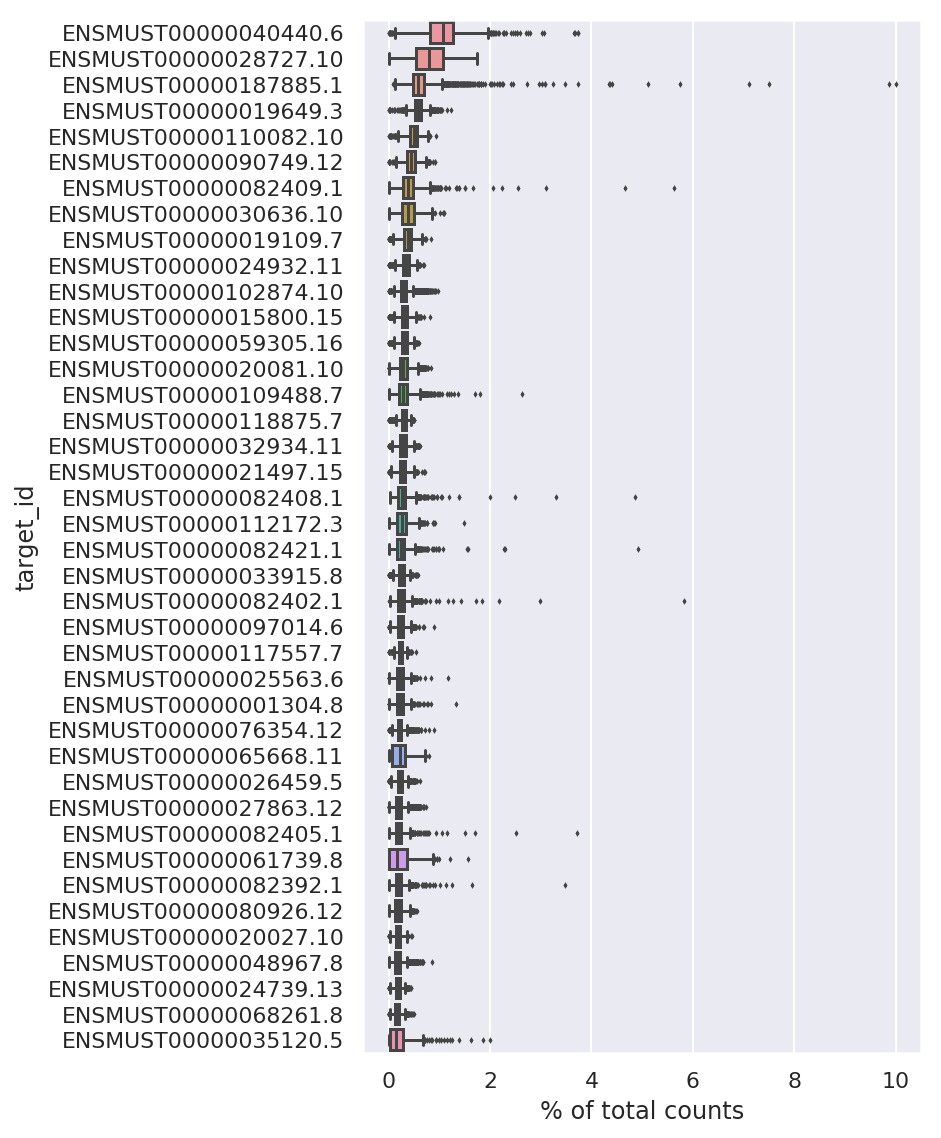

In [210]:
sc.pl.highest_expr_genes(adata, n_top=40)


In [211]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

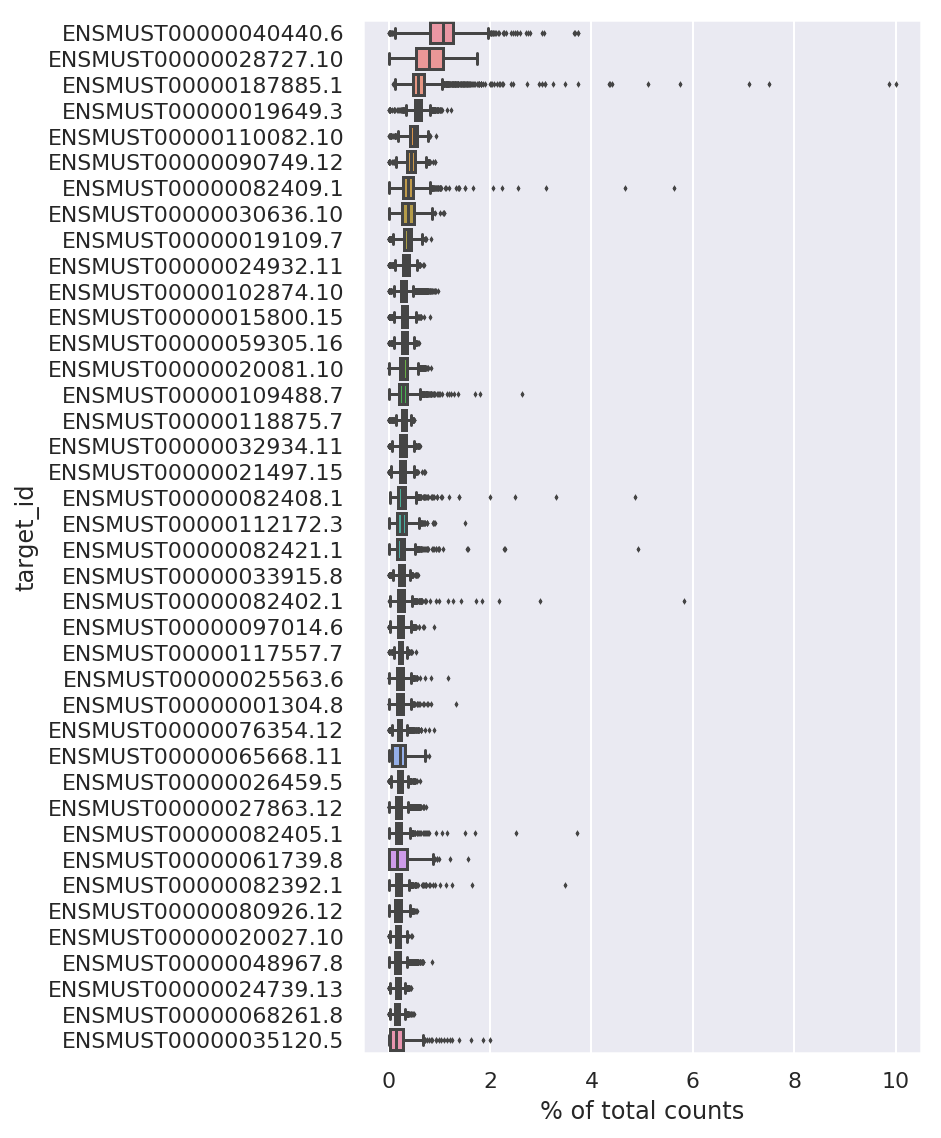

In [212]:
sc.pl.highest_expr_genes(adata, n_top=40)


In [115]:
adata

AnnData object with n_obs × n_vars = 1032 × 90515 
    obs: 'n_genes'
    var: 'n_cells'

In [213]:
adata.obs['n_counts'] = adata.X.sum(1)

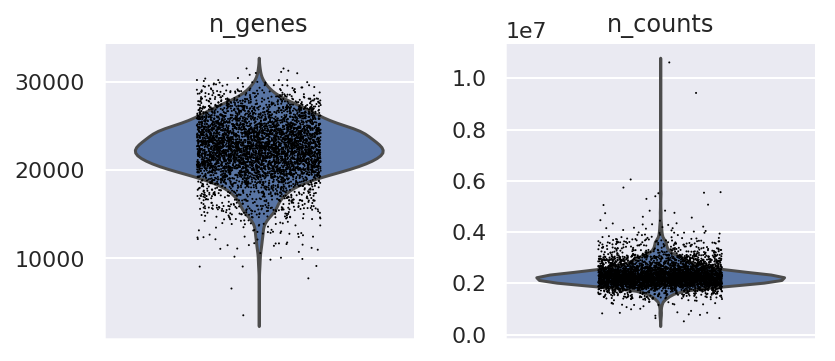

In [214]:
sc.pl.violin(adata, ['n_genes', 'n_counts'],
             jitter=0.2, multi_panel=True)

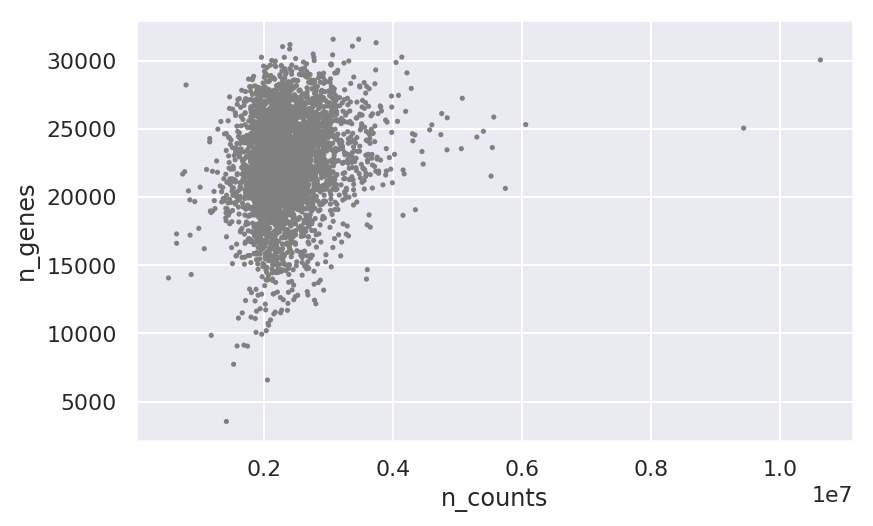

In [215]:
#sc.pl.scatter(adata, x='n_counts', y='percent_mito')
sc.pl.scatter(adata, x='n_counts', y='n_genes')

In [216]:
sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e4)


In [217]:
sc.pp.log1p(adata)


In [218]:
#sc.pp.highly_variable_genes(adata, min_mean=0.000001, max_mean=300, min_disp=0.0001)

sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)



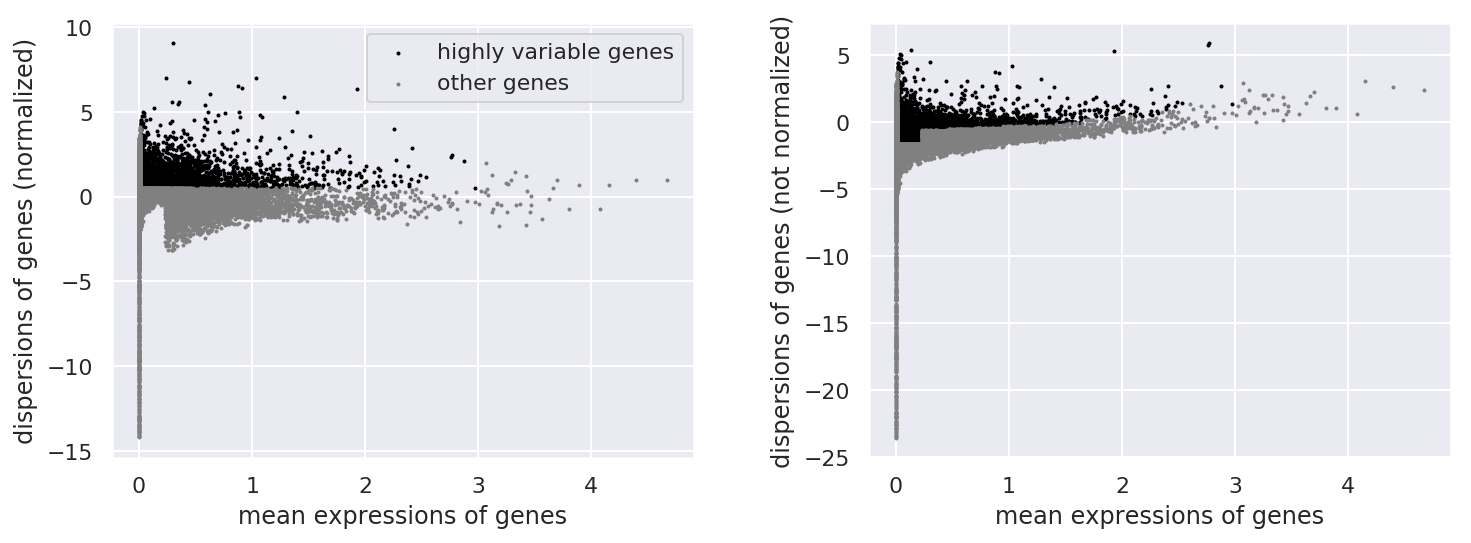

In [219]:
sc.pl.highly_variable_genes(adata)


In [220]:
adata = adata[:, adata.var['highly_variable']]


In [24]:
q = list(adata.var_names)

In [25]:
tr = []
for i in q:
    tr.append(i[:-2])

In [26]:
print(len(tr),len(set(tr)))

48794 48794


In [27]:
mouse_gene_ids = pd.read_csv('/home/nadia/transcriptomes/mouse_gene_ids.csv', index_col = 0)

In [28]:
mouse_gene_ids = mouse_gene_ids.sort_values('gene_ids')

In [221]:
sc.pp.regress_out(adata, ['n_counts'])


In [222]:
sc.pp.scale(adata, max_value=10)


In [223]:
sc.tl.pca(adata, svd_solver='arpack')


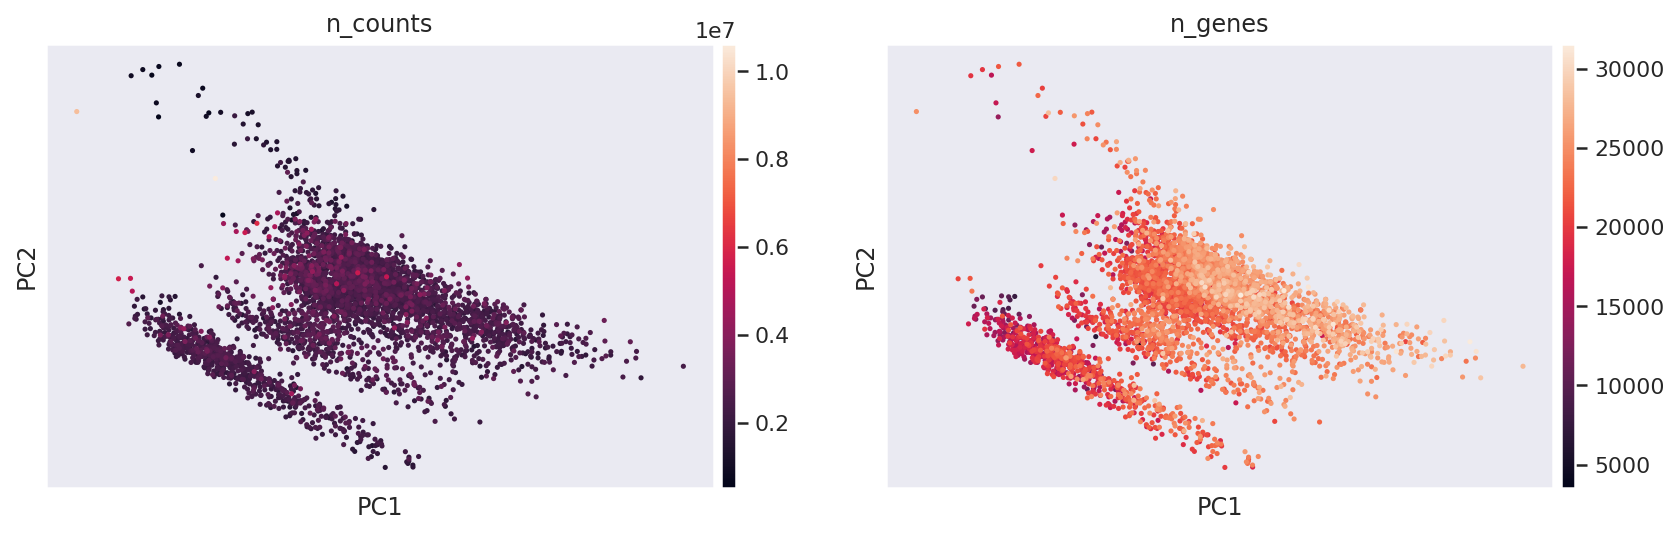

In [224]:
sc.pl.pca(adata, color=['n_counts','n_genes'])


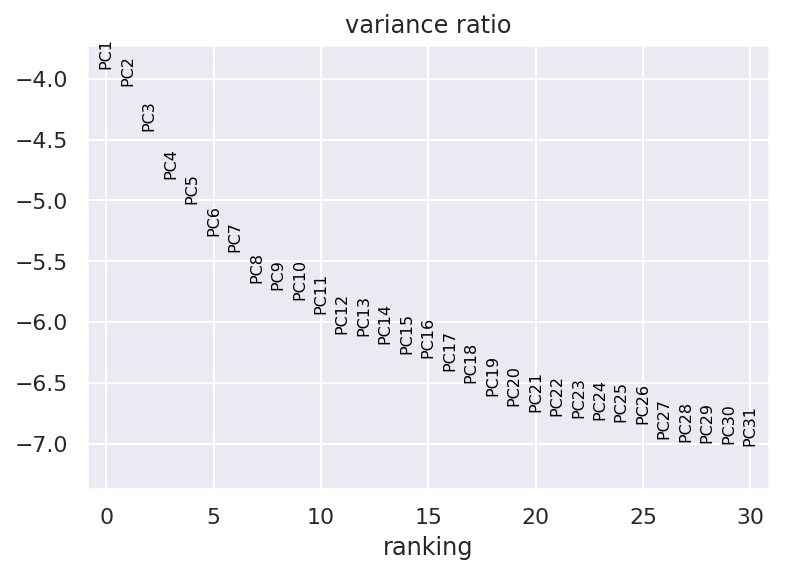

In [225]:
sc.pl.pca_variance_ratio(adata, log=True)


In [226]:
sc.pp.neighbors(adata)


In [227]:
sc.tl.umap(adata)


In [ ]:
sc.tl.tsne()

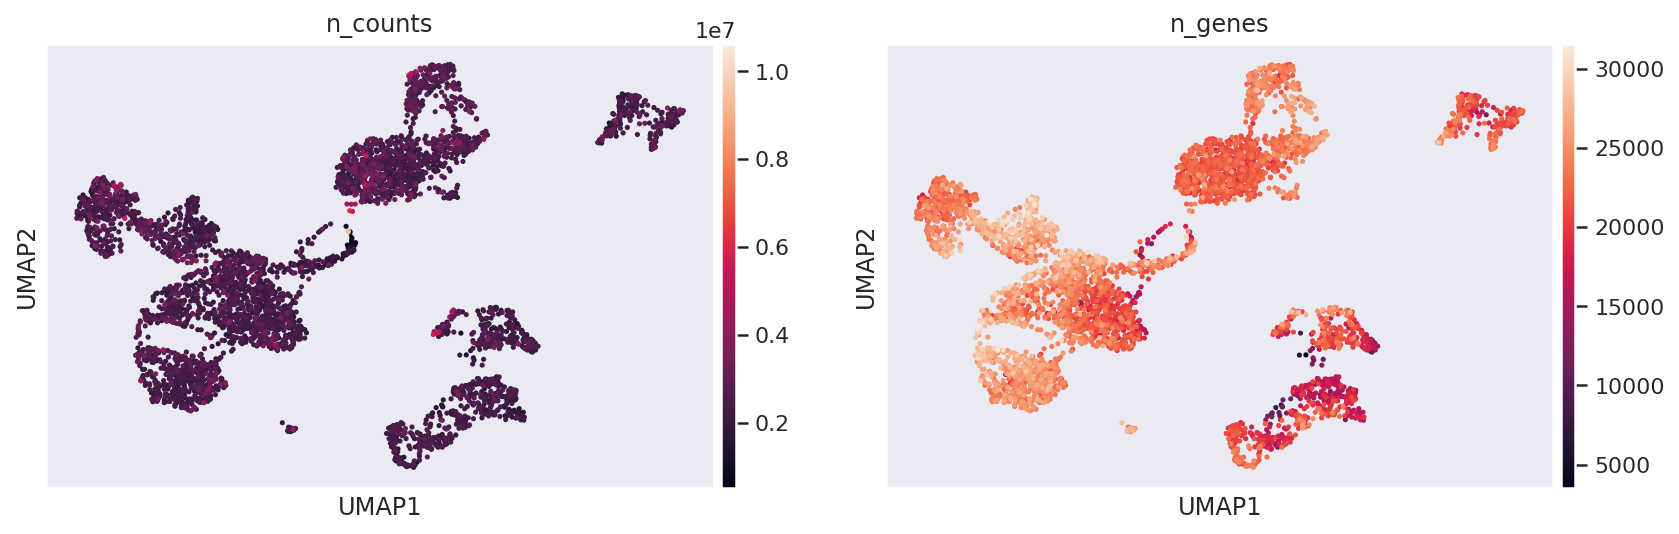

In [228]:
sc.pl.umap(adata, color=[ 'n_counts', 'n_genes'])


In [229]:
all_gene_tsne = pd.read_csv('/home/nadia/isoformDE/other/BICCN_dropbox/Zeng/SMARTer_cells_MOp/tsne.df.csv', header = 0, index_col = 0)

In [230]:
tsne_df.head()

Empty DataFrame
Columns: []
Index: []

In [45]:
tr2gene = pd.read_csv('data/mouse_transcript_to_gene.tsv',sep='\t',header =-1)

In [46]:
tr2gene.head()

0                     1              2
0  ENSMUST00000193812.1  ENSMUSG00000102693.1  4933401J01Rik
1  ENSMUST00000082908.1  ENSMUSG00000064842.1        Gm26206
2  ENSMUST00000162897.1  ENSMUSG00000051951.5           Xkr4
3  ENSMUST00000159265.1  ENSMUSG00000051951.5           Xkr4
4  ENSMUST00000070533.4  ENSMUSG00000051951.5           Xkr4

In [67]:
geneids[:10]

Index(['ENSMUST00000196221.1', 'ENSMUST00000179664.1', 'ENSMUST00000177564.1',
       'ENSMUST00000178537.1', 'ENSMUST00000178862.1', 'ENSMUST00000179520.1',
       'ENSMUST00000179883.1', 'ENSMUST00000195858.1', 'ENSMUST00000179932.1',
       'ENSMUST00000180001.1'],
      dtype='object')

In [231]:
geneids2 = MOpdata.var_names

In [232]:
len(geneids2)

116067

In [233]:
len(geneids)

116067

In [68]:
geneids = HYa1adata.var_names

In [69]:
geneids[:10]

Index(['ENSMUST00000196221.1', 'ENSMUST00000179664.1', 'ENSMUST00000177564.1',
       'ENSMUST00000178537.1', 'ENSMUST00000178862.1', 'ENSMUST00000179520.1',
       'ENSMUST00000179883.1', 'ENSMUST00000195858.1', 'ENSMUST00000179932.1',
       'ENSMUST00000180001.1'],
      dtype='object')

In [90]:
q[0]

84588    Trdd1
Name: 2, dtype: object

In [94]:
genenames = []
for i in geneids:
    genenames.append(tr2gene.loc[tr2gene[0]==i,2])


In [95]:
len(tr2gene)

137862

In [96]:
len(genenames)

116067

In [97]:
len(geneids)

116067

In [78]:
q = []
q.append('dd')
q.append('dd')
q.append('dd')

In [79]:
q

['dd', 'dd', 'dd']

In [60]:
7*100/60

11.666666666666666

In [58]:
tr2gene[tr2gene[2]=='Trdd1']

0                     1      2
84588  ENSMUST00000196221.1  ENSMUSG00000096749.2  Trdd1
84589  ENSMUST00000179664.1  ENSMUSG00000096749.2  Trdd1

In [63]:
genenames[:10]

[84588    Trdd1
 Name: 2, dtype: object, 84589    Trdd1
 Name: 2, dtype: object, 84591    Trdd2
 Name: 2, dtype: object, 49554    Trbd1
 Name: 2, dtype: object, 49566    Trbd2
 Name: 2, dtype: object, 114340    Ighd4-1
 Name: 2, dtype: object, 114341    Ighd3-2
 Name: 2, dtype: object, 114342    Ighd5-6
 Name: 2, dtype: object, 114343    Ighd5-6
 Name: 2, dtype: object, 114344    Ighd2-8
 Name: 2, dtype: object]

In [235]:
MOpdata.var['gene_name']=genenames

In [236]:
MOpdata.write('data/MOpdata.h5ad')

... storing 'gene_name' as categorical


In [237]:
df.shape

(4501, 116067)

In [245]:
len(genenames)

116067

In [246]:
cluster_membership=pd.read_csv("/home/nadia/isoformDE/other/BICCN_dropbox/Zeng/SMARTer_cells_MOp/cluster.membership.csv", header=0, index_col=0)

In [248]:
cluster_membership

x
LS-15395_S41_E1-50   19
LS-15395_S42_E1-50   19
LS-15395_S43_E1-50   46
LS-15395_S44_E1-50   45
LS-15395_S46_E1-50   38
LS-15395_S47_E1-50   10
LS-15395_S48_E1-50   38
LS-15395_S49_E1-50    4
LS-15395_S50_E1-50   38
LS-15395_S51_E1-50   20
LS-15395_S52_E1-50   45
LS-15395_S53_E1-50   21
LS-15395_S54_E1-50   33
LS-15395_S55_E1-50   21
LS-15395_S56_E1-50   34
LS-15396_S41_E1-50   37
LS-15396_S42_E1-50   37
LS-15396_S43_E1-50   14
LS-15396_S45_E1-50   37
LS-15396_S46_E1-50   25
LS-15396_S47_E1-50   34
LS-15396_S48_E1-50   20
LS-15396_S49_E1-50   35
LS-15396_S52_E1-50   34
LS-15396_S53_E1-50   37
LS-15396_S54_E1-50   34
LS-15396_S55_E1-50   37
LS-15396_S56_E1-50   37
LS-15396_S57_E1-50   37
LS-15396_S58_E1-50   35
...                  ..
SM-GE92M_S064_E1-50  25
SM-GE92M_S065_E1-50  25
SM-GE92M_S066_E1-50  27
SM-GE92M_S067_E1-50  28
SM-GE92M_S068_E1-50  25
SM-GE92M_S070_E1-50  27
SM-GE92M_S071_E1-50  27
SM-GE92M_S073_E1-50  27
SM-GE92M_S074_E1-50  25
SM-GE92M_S075_E1-50  27
SM-GE92M_S076_E1-50  25
SM-GE92M_S077_E1-50  27
SM-GE92M_S078_E1-50  27
SM-GE92M_S079_E1-50  25
SM-GE92M_S080_E1-50  25
SM-GE92M_S081_E1-50  27
SM-GE92M_S082_E1-50  25
SM-GE92M_S083_E1-50  25
SM-GE92M_S084_E1-50  27
SM-GE92M_S086_E1-50  25
SM-GE92M_S087_E1-50  25
SM-GE92M_S088_E1-50  27
SM-GE92M_S089_E1-50  25
SM-GE92M_S090_E1-50  27
SM-GE92M_S091_E1-50  25
SM-GE92M_S092_E1-50  27
SM-GE92M_S093_E1-50  27
SM-GE92M_S094_E1-50  27
SM-GE92M_S095_E1-50  25
SM-GE92M_S096_E1-50  25

[6300 rows x 1 columns]

In [249]:
MOpdata

AnnData object with n_obs × n_vars = 4501 × 116067 
    var: 'gene_name'

In [257]:
len(set(MOpdata.obs_names).intersection(set(cluster_membership.index)))

4302

In [264]:
'SM-GE92M_S096_E1-50' in cluster_membership.index

True

In [267]:
MOpdata

AnnData object with n_obs × n_vars = 4501 × 116067 
    var: 'gene_name'

In [268]:
MOpdata.obs['n_counts'] = MOpdata.X.sum(1)

In [284]:
'LS-15395_S41_E1-50' in cluster_membership.index

True

In [297]:
MOpdata.obs['cluster'] = 0

In [325]:
MOpdata.var['SM-DD44S_S96_E1-50']

KeyError: 'SM-DD44S_S96_E1-50'

In [324]:
MOpdata.obs['cluster']

LS-15395_S41_E1-50     0
LS-15395_S42_E1-50     0
LS-15395_S43_E1-50     0
LS-15395_S44_E1-50     0
LS-15395_S45_E1-50     0
LS-15395_S46_E1-50     0
LS-15395_S47_E1-50     0
LS-15395_S48_E1-50     0
LS-15395_S49_E1-50     0
LS-15395_S50_E1-50     0
LS-15395_S51_E1-50     0
LS-15395_S52_E1-50     0
LS-15395_S53_E1-50     0
LS-15395_S54_E1-50     0
LS-15395_S55_E1-50     0
LS-15395_S56_E1-50     0
LS-15396_S41_E1-50     0
LS-15396_S42_E1-50     0
LS-15396_S43_E1-50     0
LS-15396_S44_E1-50     0
LS-15396_S45_E1-50     0
LS-15396_S46_E1-50     0
LS-15396_S47_E1-50     0
LS-15396_S48_E1-50     0
LS-15396_S49_E1-50     0
LS-15396_S50_E1-50     0
LS-15396_S51_E1-50     0
LS-15396_S52_E1-50     0
LS-15396_S53_E1-50     0
LS-15396_S54_E1-50     0
                      ..
SM-DD44R_S69_E1-50     0
SM-DD44R_S70_E1-50     0
SM-DD44R_S71_E1-50     0
SM-DD44R_S72_E1-50     0
SM-DD44S_S81_E1-50     0
SM-DD44S_S82_E1-50     0
SM-DD44S_S83_E1-50     0
SM-DD44S_S84_E1-50     0
SM-DD44S_S85_E1-50     0


In [331]:
MOpdata[MOpdata.obs_names.isin(['LS-15501_S31_E1-50'])].X[MOpdata.var_names.isin(['cluster'])]

ArrayView([], dtype=float32)

In [341]:
MOpdata.obs['cluster'][MOpdata.obs_names.isin(['LS-15501_S31_E1-50'])]

LS-15501_S31_E1-50    0
Name: cluster, dtype: int64

In [336]:
sum(MOpdata.var_names.isin(['cluster']))

0

In [335]:
MOpdata[MOpdata.obs_names.isin(['LS-15501_S31_E1-50'])].X[:20]

ArrayView([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 0., 0.], dtype=float32)

In [299]:
cluster_membership.loc['LS-15395_S41_E1-50','x']

19

In [347]:
other_cells = []

In [348]:
for i in MOpdata.obs_names:
    if (i in cluster_membership.index):
        #print(i)
        MOpdata.obs['cluster'][MOpdata.obs_names.isin([i])]=cluster_membership.loc[i,'x']
    else: other_cells.append(i)
   # else: print(i,i in cluster_membership.index)

/home/nadia/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [349]:
MOpdata.obs['cluster'][:20]

LS-15395_S41_E1-50    19
LS-15395_S42_E1-50    19
LS-15395_S43_E1-50    46
LS-15395_S44_E1-50    45
LS-15395_S45_E1-50     0
LS-15395_S46_E1-50    38
LS-15395_S47_E1-50    10
LS-15395_S48_E1-50    38
LS-15395_S49_E1-50     4
LS-15395_S50_E1-50    38
LS-15395_S51_E1-50    20
LS-15395_S52_E1-50    45
LS-15395_S53_E1-50    21
LS-15395_S54_E1-50    33
LS-15395_S55_E1-50    21
LS-15395_S56_E1-50    34
LS-15396_S41_E1-50    37
LS-15396_S42_E1-50    37
LS-15396_S43_E1-50    14
LS-15396_S44_E1-50     0
Name: cluster, dtype: int64

In [350]:
adata.obs['cluster'] = MOpdata.obs['cluster']

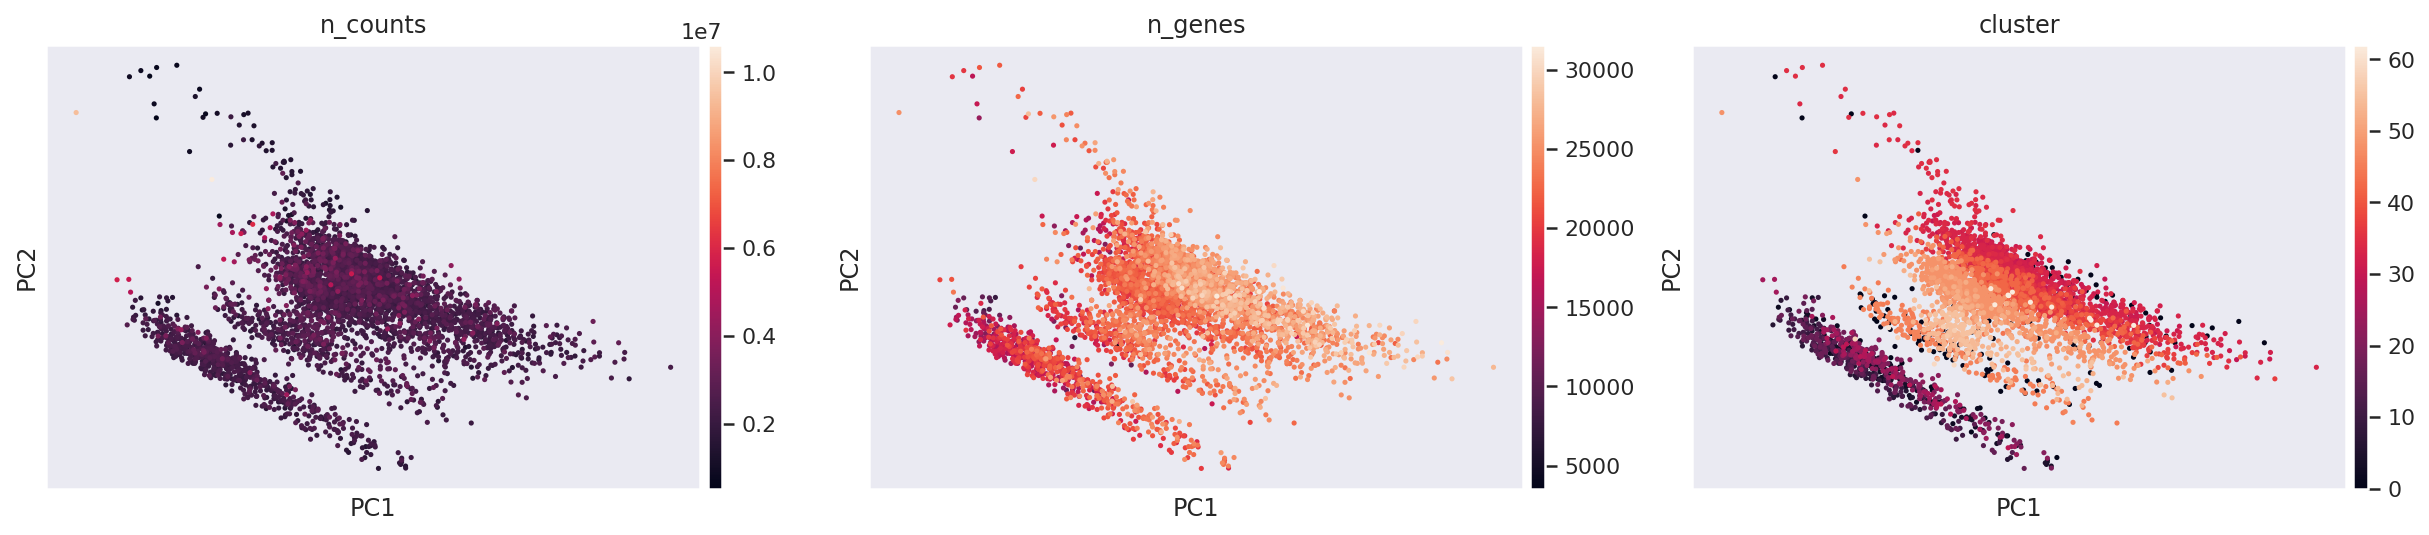

In [351]:
sc.pl.pca(adata, color=['n_counts','n_genes','cluster'])


In [352]:
sc.tl.tsne(adata)

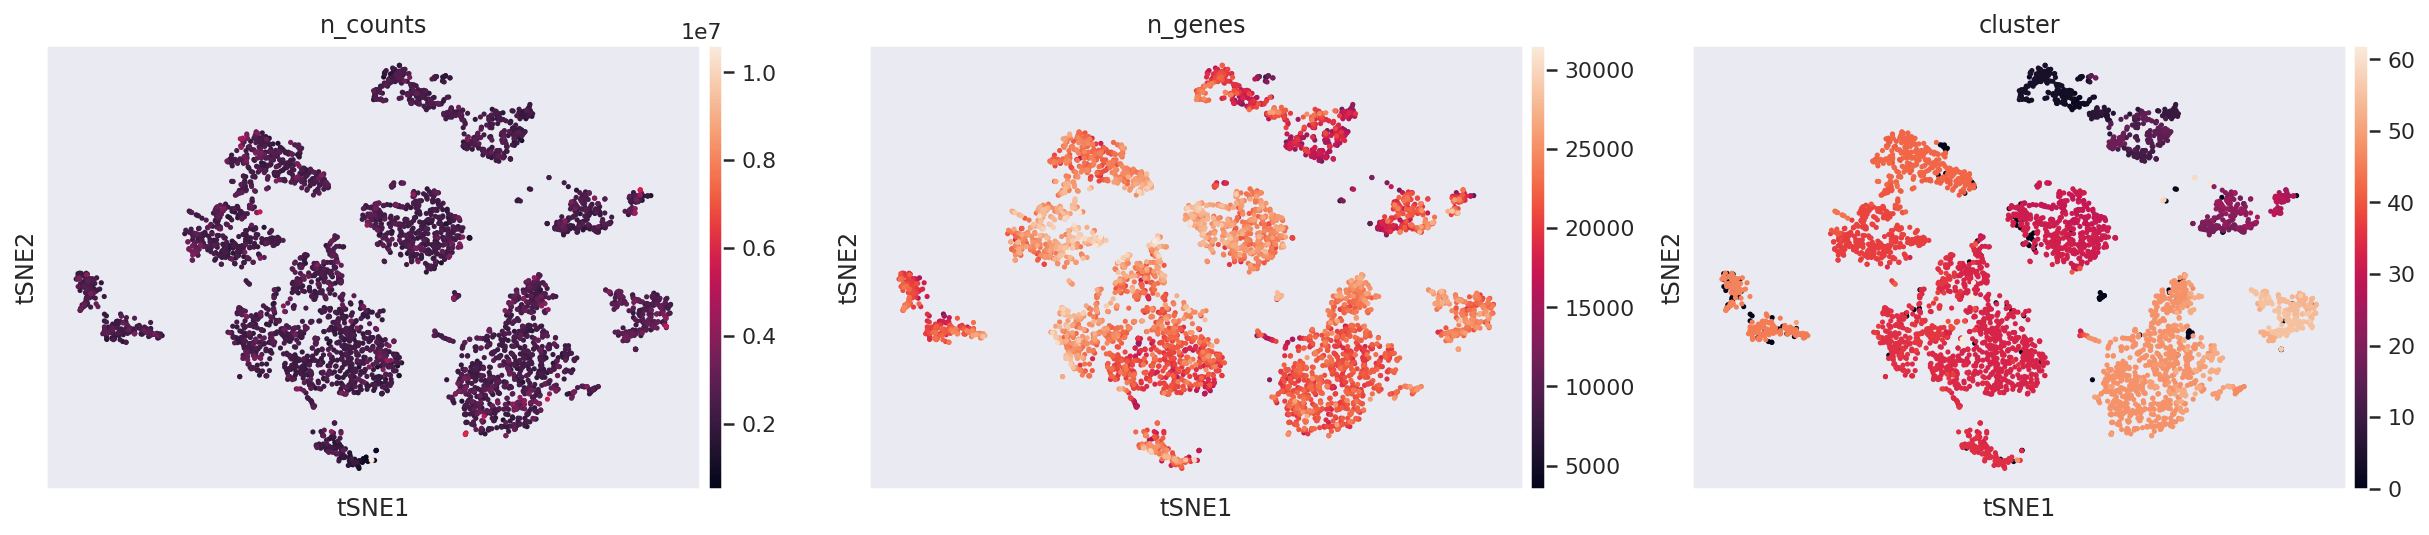

In [354]:
sc.pl.tsne(adata, color=[ 'n_counts', 'n_genes', 'cluster'])


In [361]:
?plt.scatter

Signature:
plt.scatter(
    x,
    y,
    s=None,
    c=None,
    marker=None,
    cmap=None,
    norm=None,
    vmin=None,
    vmax=None,
    alpha=None,
    linewidths=None,
    verts=None,
    edgecolors=None,
    *,
    data=None,
    **kwargs,
)
Docstring:
A scatter plot of *y* vs *x* with varying marker size and/or color.

Parameters
----------
x, y : array_like, shape (n, )
    The data positions.

s : scalar or array_like, shape (n, ), optional
    The marker size in points**2.
    Default is ``rcParams['lines.markersize'] ** 2``.

c : color, sequence, or sequence of color, optional
    The marker color. Possible values:

    - A single color format string.
    - A sequence of color specifications of length n.
    - A sequence of n numbers to be mapped to colors using *cmap* and
      *norm*.
    - A 2-D array in which the rows are RGB or RGBA.

    Note that *c* should not be a single numeric RGB or RGBA sequence
    because that is indistinguishable from an array of values to

In [380]:
len(adata.obsm['X_tsne'][:,0])

4501

In [410]:
sample_info = pd.DataFrame(index = adata.obs_names)
sample_info['cluster'] = adata.obs['cluster']
sample_info['tsne2'] = adata.obsm['X_tsne'][:,1]
sample_info['tsne1'] = adata.obsm['X_tsne'][:,0]
sample_info['n_genes'] = adata.obs['n_genes']
sample_info['n_counts'] = adata.obs['n_counts']
sample_info['umap1'] = adata.obsm['X_umap'][:,0]
sample_info['umap2'] = adata.obsm['X_umap'][:,1]


In [395]:
sample_info.cluster.max()

62

/home/nadia/miniconda3/envs/py37/lib/python3.7/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


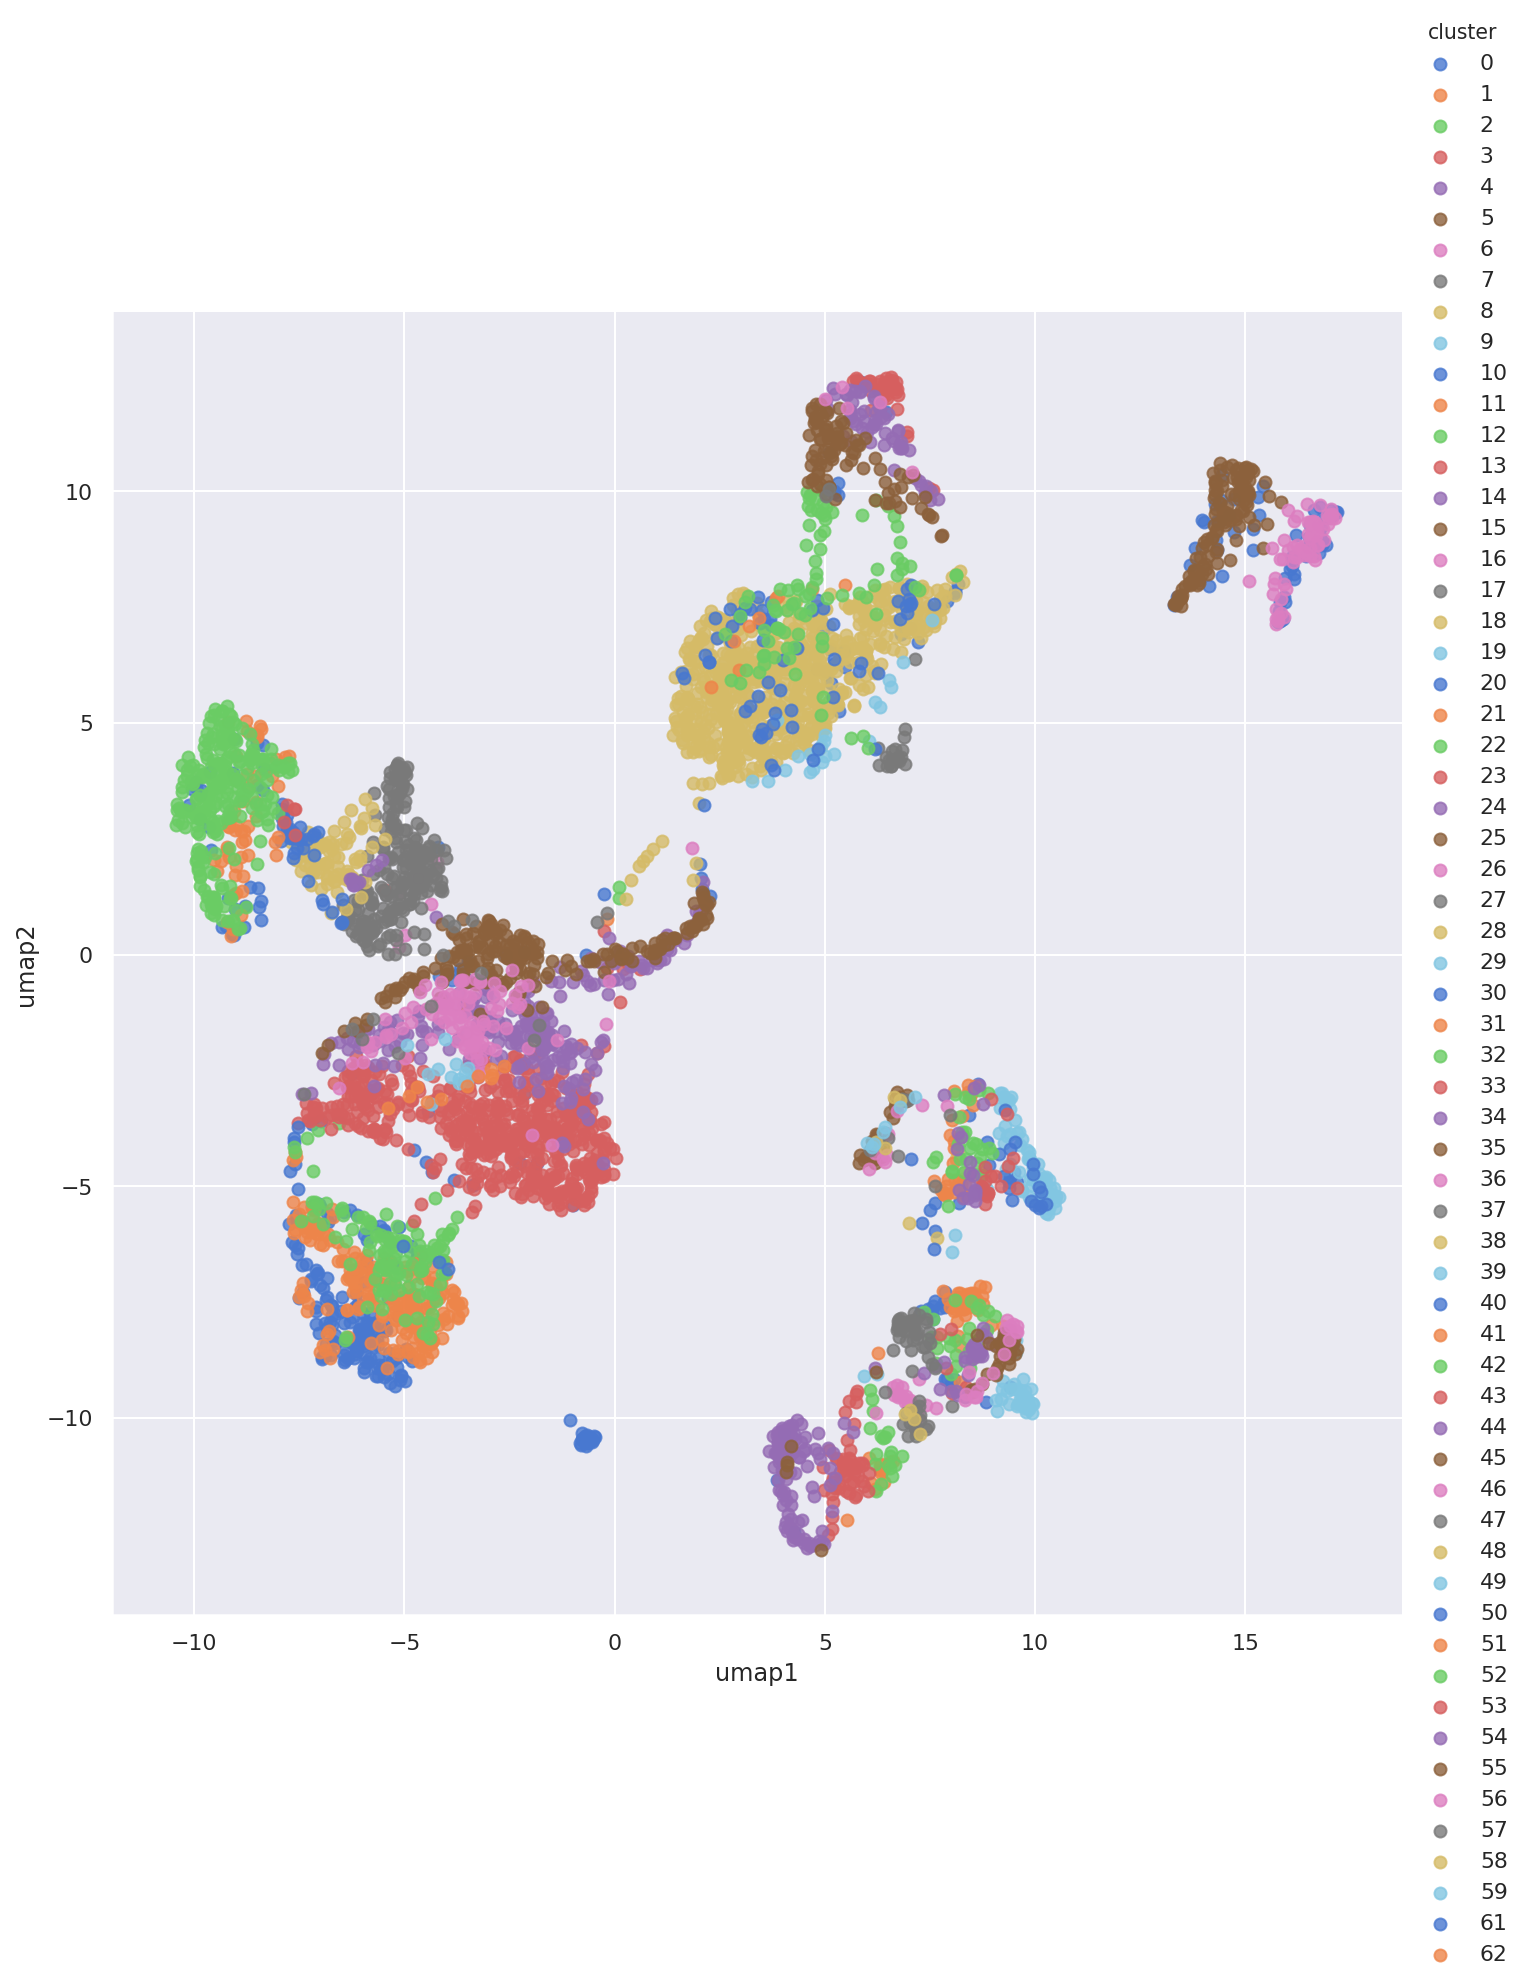

In [411]:
sns.diverging_palette(255, 133, l=60, n=7, center="dark")
# Use the 'hue' argument to provide a factor variable
sns.lmplot( x="umap1", y="umap2", data=sample_info, fit_reg=False, \
           hue='cluster', legend=True, palette = sns.color_palette("muted"), size = 10)
 
# Move the legend to an empty part of the plot
#plt.legend(loc='right')
 
plt.show()

<Figure size 432x288 with 0 Axes>

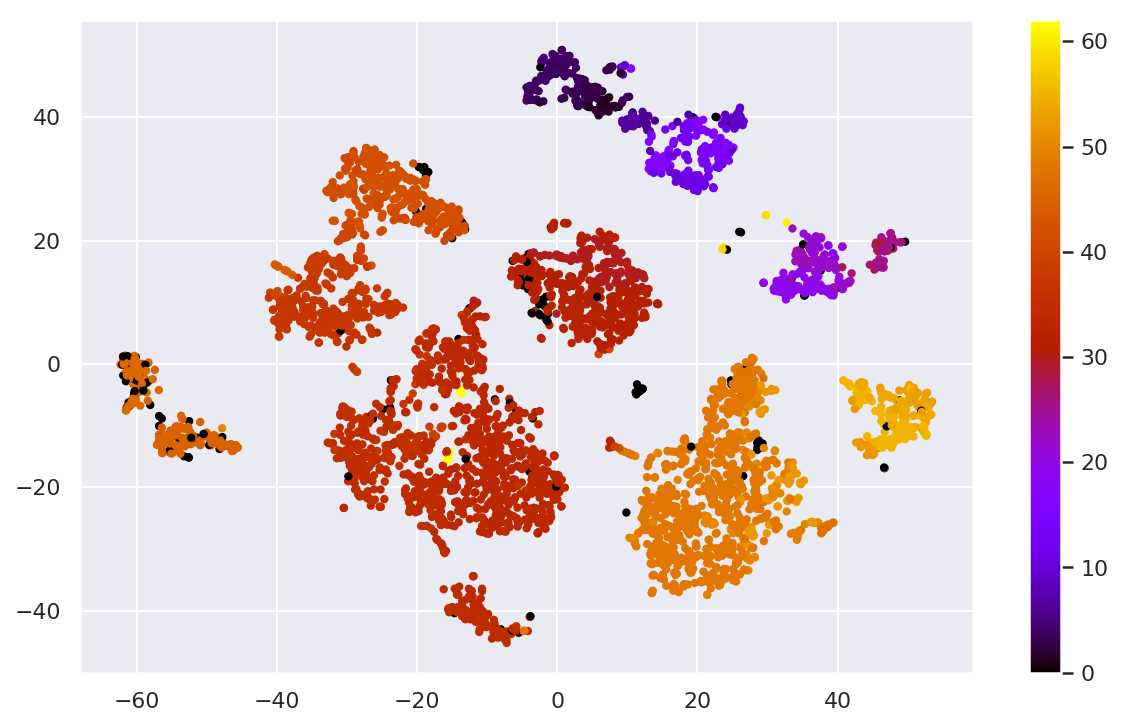

In [426]:
plt.set_cmap('gnuplot')
plt.figure(figsize=(10,6))
plt.scatter(sample_info.tsne1,sample_info.tsne2, c = sample_info.cluster, s = 10)
#plt.legend('upper right')
plt.colorbar()
plt.show()

In [442]:
cluster_membership.sort_values('x').x.value_counts(sort=False)

4     194
8       7
12     87
16     43
20     55
24     47
28     45
32    128
36    120
40     68
44     12
48    781
52    144
56     32
60      7
1      31
5      14
9     102
13     26
17     85
21     79
25    292
29     13
33    624
37    251
41     56
45    138
49     24
53    115
57      8
     ... 
6      50
10     33
14     53
18     17
22     58
26     34
30    124
34    256
38     83
42    271
46     72
50     68
54    130
58     10
62     12
3      82
7      77
11    113
15     67
19    136
23     37
27    159
31    231
35    226
39     12
43      5
47     21
51     10
55    142
59      6
Name: x, Length: 62, dtype: int64

In [429]:
sample_info.groupby('cluster').count()

tsne2  tsne1  n_genes  n_counts  umap1  umap2
cluster                                               
0          199    199      199       199    199    199
1           12     12       12        12     12     12
2           20     20       20        20     20     20
3           52     52       52        52     52     52
4          102    102      102       102    102    102
5            5      5        5         5      5      5
6           23     23       23        23     23     23
7           20     20       20        20     20     20
8            4      4        4         4      4      4
9           37     37       37        37     37     37
10          14     14       14        14     14     14
11          35     35       35        35     35     35
12          26     26       26        26     26     26
13           5      5        5         5      5      5
14          28     28       28        28     28     28
15          34     34       34        34     34     34
16          17     17       17        17     17     17
17          39     39       39        39     39     39
18           5      5        5         5      5      5
19          60     60       60        60     60     60
20          18     18       18        18     18     18
21          33     33       33        33     33     33
22          28     28       28        28     28     28
23          19     19       19        19     19     19
24          18     18       18        18     18     18
25          32     32       32        32     32     32
26          10     10       10        10     10     10
27          10     10       10        10     10     10
28           4      4        4         4      4      4
29           7      7        7         7      7      7
...        ...    ...      ...       ...    ...    ...
32         122    122      122       122    122    122
33         573    573      573       573    573    573
34         225    225      225       225    225    225
35         207    207      207       207    207    207
36         112    112      112       112    112    112
37         234    234      234       234    234    234
38          75     75       75        75     75     75
39          12     12       12        12     12     12
40          57     57       57        57     57     57
41          54     54       54        54     54     54
42         248    248      248       248    248    248
43           5      5        5         5      5      5
44          10     10       10        10     10     10
45         119    119      119       119    119    119
46          64     64       64        64     64     64
47          21     21       21        21     21     21
48         710    710      710       710    710    710
49          22     22       22        22     22     22
50          63     63       63        63     63     63
51           9      9        9         9      9      9
52          91     91       91        91     91     91
53          39     39       39        39     39     39
54          59     59       59        59     59     59
55          91     91       91        91     91     91
56           5      5        5         5      5      5
57           2      2        2         2      2      2
58           2      2        2         2      2      2
59           2      2        2         2      2      2
61           1      1        1         1      1      1
62          11     11       11        11     11     11

[62 rows x 6 columns]

/home/nadia/miniconda3/envs/py37/lib/python3.7/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


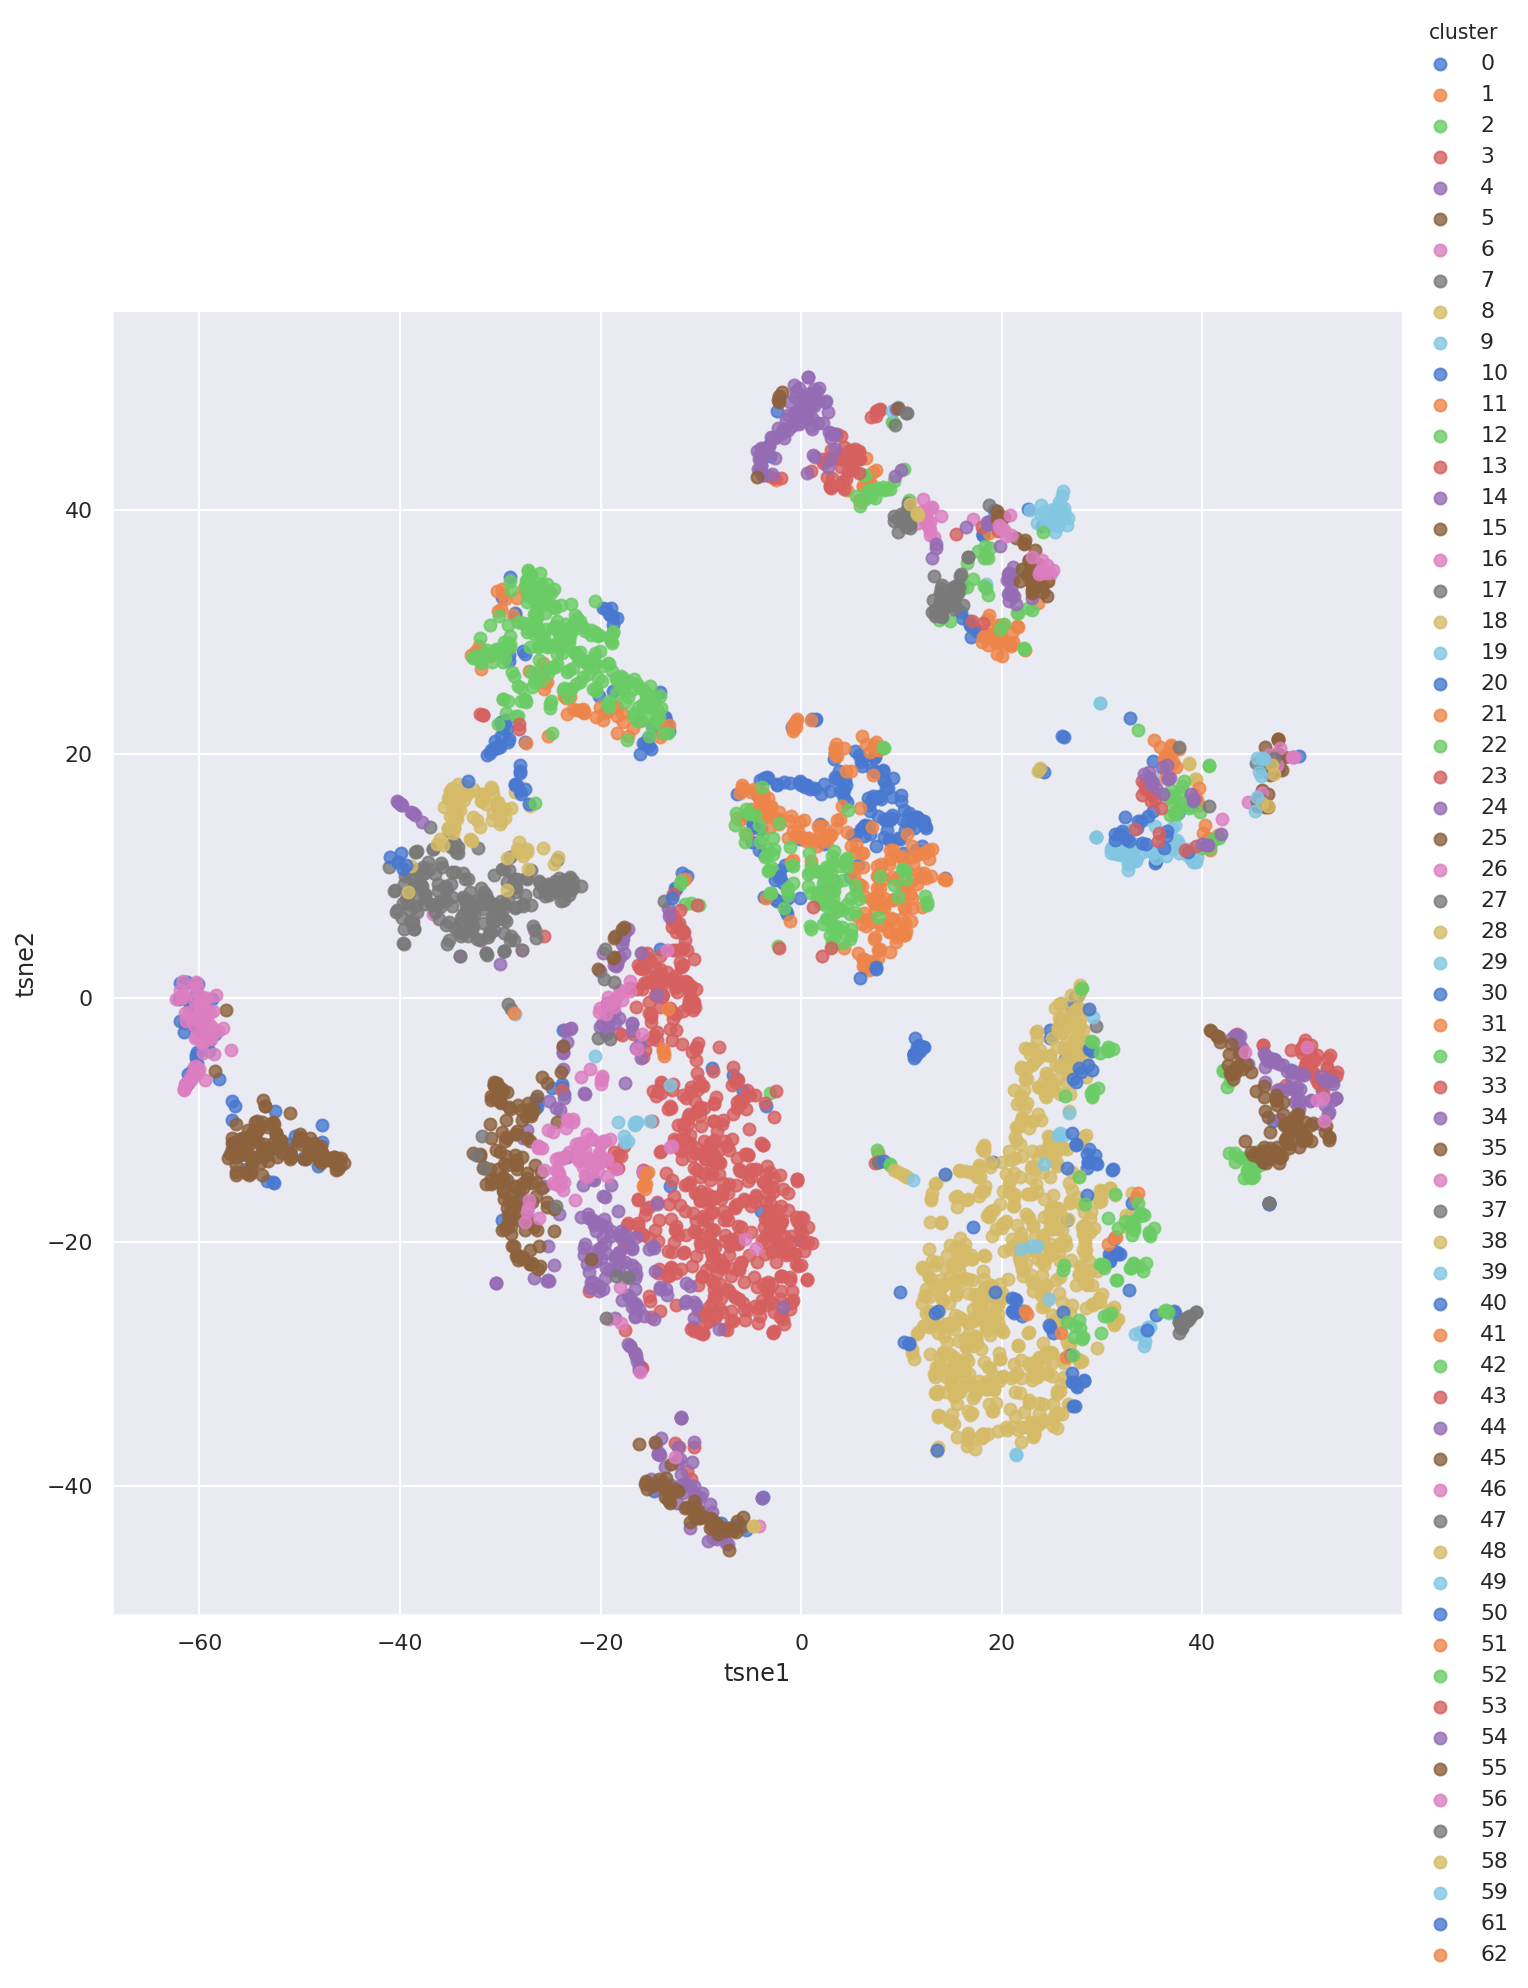

In [409]:
sns.diverging_palette(255, 133, l=60, n=7, center="dark")
# Use the 'hue' argument to provide a factor variable
sns.lmplot( x="tsne1", y="tsne2", data=sample_info, fit_reg=False, \
           hue='cluster', legend=True, palette = sns.color_palette("muted"), size = 10)
 
# Move the legend to an empty part of the plot
#plt.legend(loc='right')
 
plt.show()

/home/nadia/miniconda3/envs/py37/lib/python3.7/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


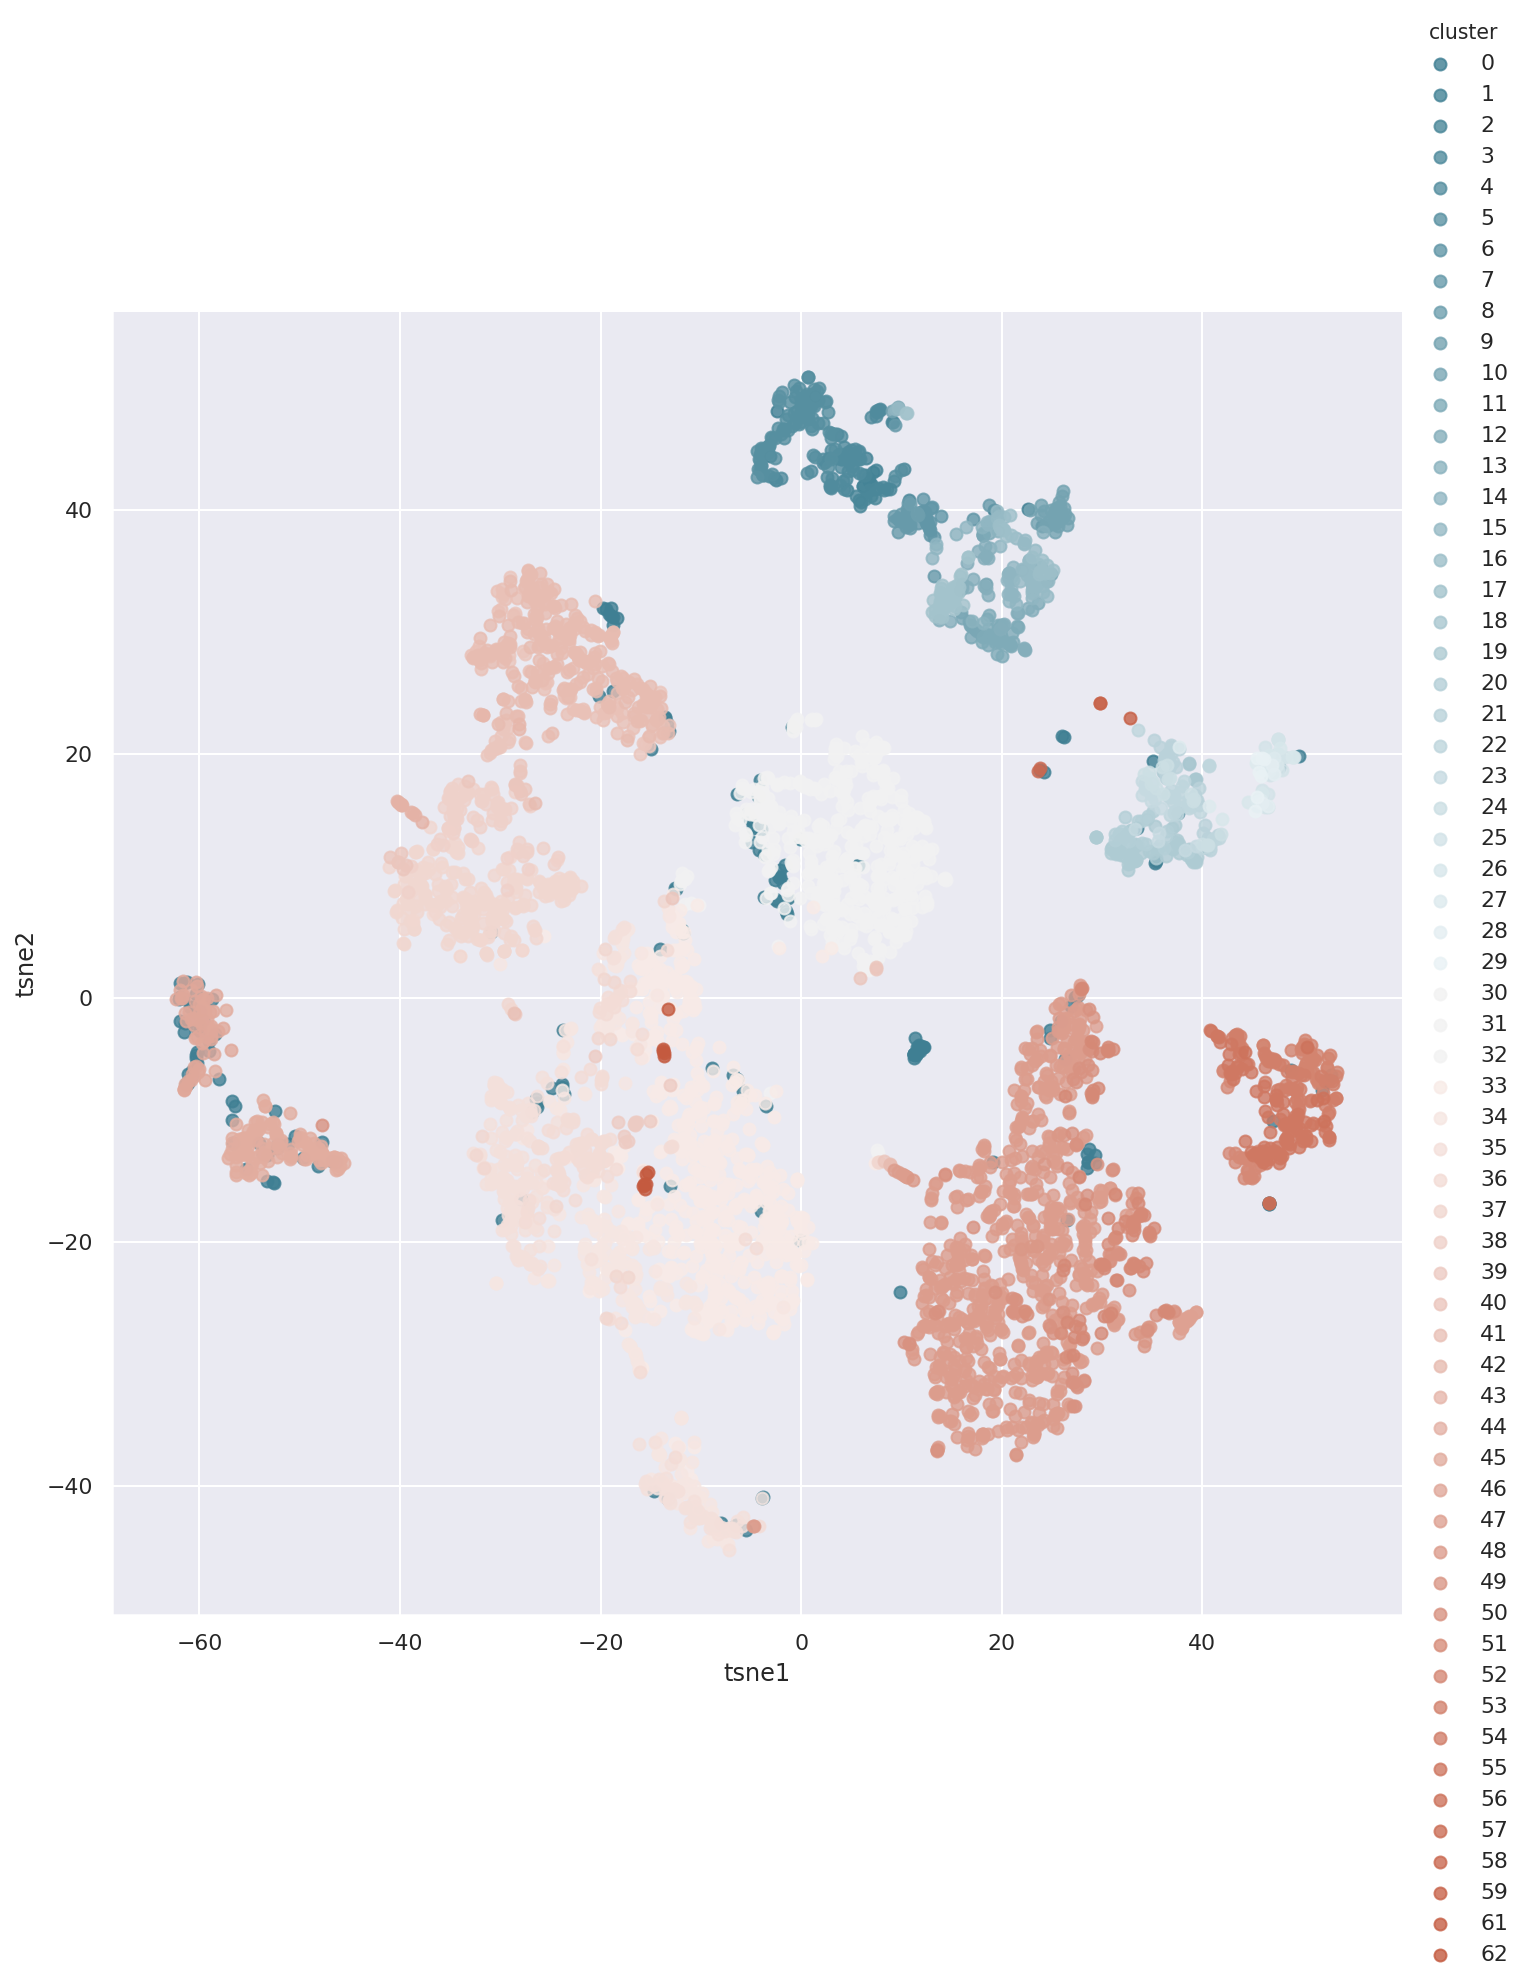

In [413]:
 
# Use the 'hue' argument to provide a factor variable
sns.lmplot( x="tsne1", y="tsne2", data=sample_info, fit_reg=False, \
           hue='cluster', legend=True, palette = sns.diverging_palette(220, 20, n=63), size = 10)
 
# Move the legend to an empty part of the plot
#plt.legend(loc='right')
 
plt.show()

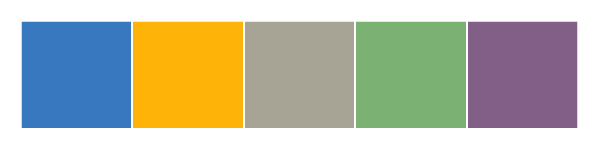

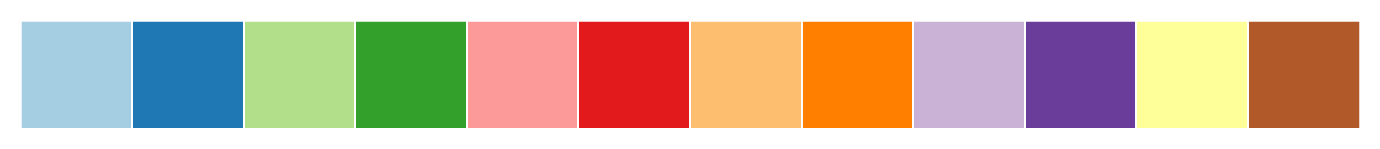

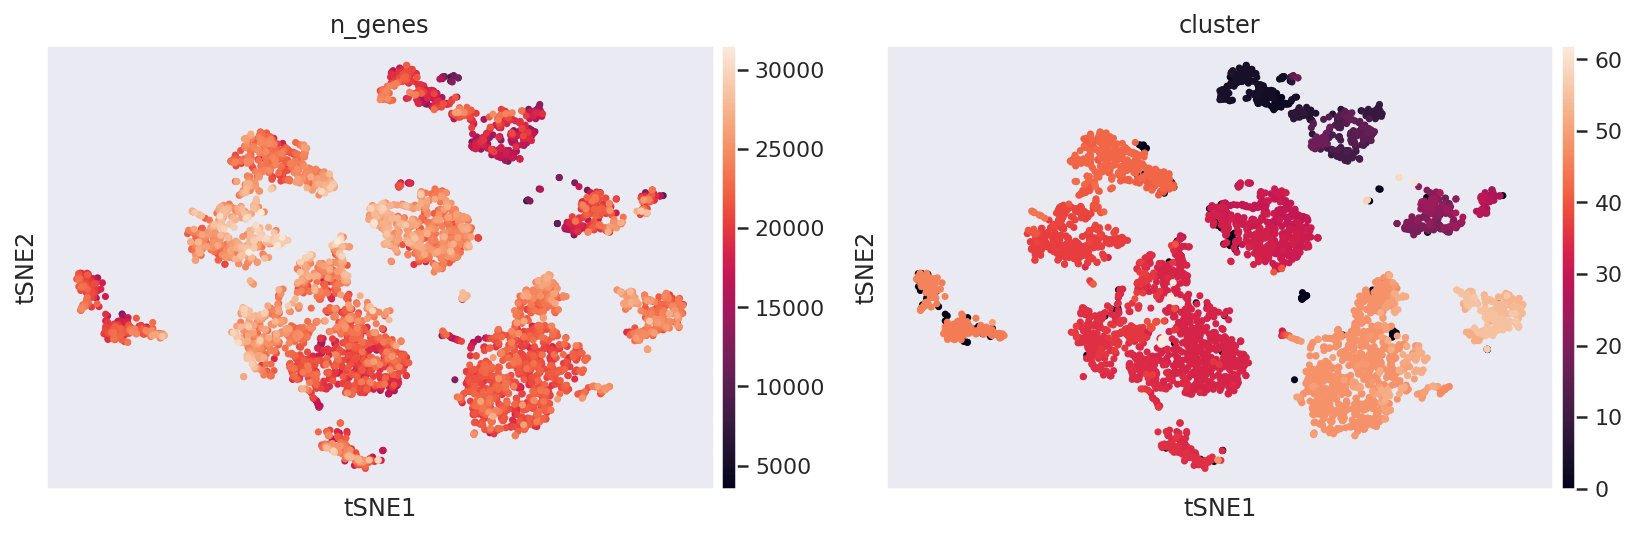

In [414]:
colors = ["windows blue", "amber", "greyish", "faded green", "dusty purple"]
sns.palplot(sns.xkcd_palette(colors))
sns.palplot(sns.color_palette("Paired"))
sns.set_palette("Paired")
sc.pl.tsne(adata, color=['n_genes', 'cluster'],s = 50)
